## ML_LAB05
## DECISION TREES AND ENSEMBLE METHODS
### LAKSHITA SETHI
### 21BDA54

### 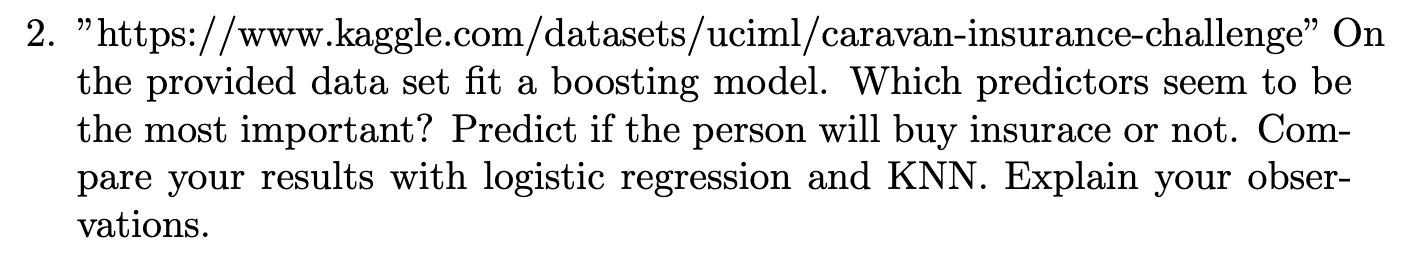

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [63]:
data = pd.read_csv("/Users/lakshitasethi/Downloads/caravan-insurance-challenge.csv")

In [64]:
data.head()

,ORIGIN,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,train,33,1,3,2,8,0,5,1,3,...,0,0,0,1,0,0,0,0,0,0
1,train,37,1,2,2,8,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0
2,train,37,1,2,2,8,0,4,2,4,...,0,0,0,1,0,0,0,0,0,0
3,train,9,1,3,3,3,2,3,2,4,...,0,0,0,1,0,0,0,0,0,0
4,train,40,1,4,2,10,1,4,1,4,...,0,0,0,1,0,0,0,0,0,0


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 87 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ORIGIN    9822 non-null   object
 1   MOSTYPE   9822 non-null   int64 
 2   MAANTHUI  9822 non-null   int64 
 3   MGEMOMV   9822 non-null   int64 
 4   MGEMLEEF  9822 non-null   int64 
 5   MOSHOOFD  9822 non-null   int64 
 6   MGODRK    9822 non-null   int64 
 7   MGODPR    9822 non-null   int64 
 8   MGODOV    9822 non-null   int64 
 9   MGODGE    9822 non-null   int64 
 10  MRELGE    9822 non-null   int64 
 11  MRELSA    9822 non-null   int64 
 12  MRELOV    9822 non-null   int64 
 13  MFALLEEN  9822 non-null   int64 
 14  MFGEKIND  9822 non-null   int64 
 15  MFWEKIND  9822 non-null   int64 
 16  MOPLHOOG  9822 non-null   int64 
 17  MOPLMIDD  9822 non-null   int64 
 18  MOPLLAAG  9822 non-null   int64 
 19  MBERHOOG  9822 non-null   int64 
 20  MBERZELF  9822 non-null   int64 
 21  MBERBOER  9822

In [66]:
data.isna().sum().sum()

0

In [67]:
data.shape

(9822, 87)

In [68]:
data.columns

Index(['ORIGIN', 'MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD',
       'MGODRK', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV',
       'MFALLEEN', 'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG',
       'MBERHOOG', 'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO',
       'MSKA', 'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1',
       'MAUT2', 'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045',
       'MINK4575', 'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART',
       'PWABEDR', 'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT',
       'PAANHANG', 'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG',
       'PGEZONG', 'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS',
       'PINBOED', 'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT',
       'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT',
       'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND',
       'AZEILPL', 'APLEZIER',

In [69]:
data.ORIGIN.value_counts()

train    5822
test     4000
Name: ORIGIN, dtype: int64

In [42]:
data.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,...,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9822.00000,9822.000000,9822.000000,9822.000000
mean,24.253207,1.108735,2.677561,2.996437,5.779067,0.700672,4.637650,1.050092,3.262981,6.188964,...,0.004582,0.007941,0.004276,0.574018,0.000916,0.005091,0.03146,0.008450,0.013846,0.059662
std,12.918058,0.412101,0.780701,0.804660,2.874148,1.015107,1.721212,1.011156,1.606287,1.896070,...,0.067535,0.088764,0.071224,0.561255,0.030258,0.077996,0.20907,0.092647,0.117728,0.236872
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,41.000000,10.000000,6.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,4.00000,2.000000,2.000000,1.000000


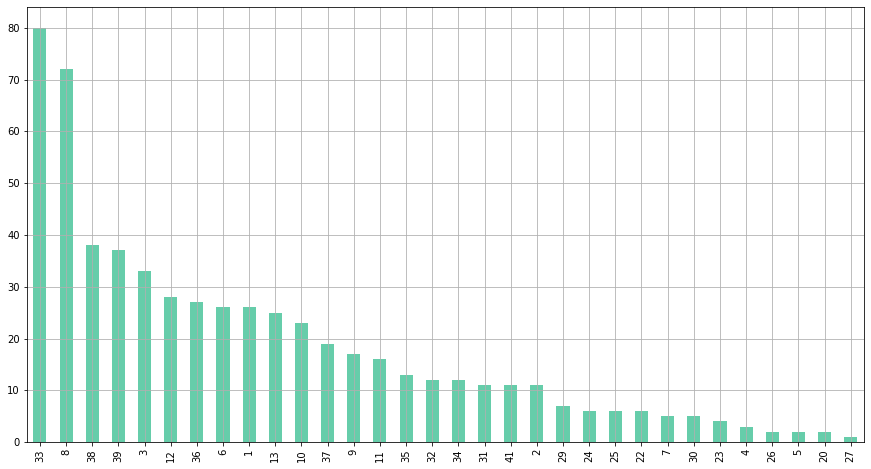

In [36]:
# Customer MOS Type

d = data[data.CARAVAN == 1].copy()
plt.figure(figsize=(15,8))
d['MOSTYPE'].value_counts().plot(kind='bar', align='center',color='#66CDAA', grid=True);

In [70]:
# Split the data into train and test datasets.
df_train = data[data['ORIGIN']=="train"]
df_test = data[data["ORIGIN"]=="test"]

In [71]:
df_train = df_train.drop('ORIGIN', axis=1)
df_test = df_test.drop('ORIGIN', axis=1)

In [72]:
# Splitting the data into X's and Y's
x_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].values

x_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, -1].values

In [73]:
# Data Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(np.array(x_train))
x_test = scaler.transform(x_test)

In [74]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score

In [75]:
classifiers = [
    LogisticRegression(max_iter = 1000,random_state = 48),
    KNeighborsClassifier(3),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),]

In [76]:
# Logging for Visual Comparison
log_cols=["Classifier", "F-score", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    test_predictions = clf.predict(x_test)
    acc = f1_score(y_test, test_predictions)
    print("F-score: {:.4%}".format(acc))
    
    test_predictions = clf.predict_proba(x_test)
    ll = log_loss(y_test, test_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

LogisticRegression
F-score: 2.4390%
Log Loss: 0.20798785467233535
KNeighborsClassifier
F-score: 6.8493%
Log Loss: 1.4346234881377653
AdaBoostClassifier
F-score: 3.1621%
Log Loss: 0.6526388876716189
GradientBoostingClassifier
F-score: 3.9526%
Log Loss: 0.20911325399076997


In [53]:
# F Score
# Fbeta-measure is a configurable single-score metric for 
# evaluating a binary classification model based on the predictions made for the positive class.

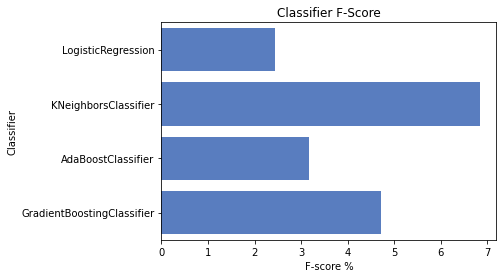

In [52]:
sns.set_color_codes("muted")
sns.barplot(x='F-score', y='Classifier', data=log, color="b")

plt.xlabel('F-score %')
plt.title('Classifier F-Score')
plt.show()

In [54]:
# Log Loss Visualization
# For any given problem, a lower log-loss value means better predictions. 
# Log Loss is a slight twist on something called the Likelihood Function.

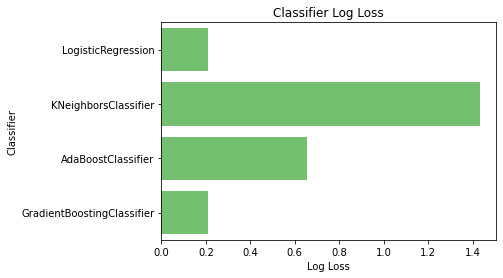

In [51]:
sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

## Boosting Classifier

In [97]:
Y_train = df_train.CARAVAN
X_train = df_train.drop(['CARAVAN'], axis=1)

In [99]:
Y_test = df_test.CARAVAN
X_test = df_test.drop(['CARAVAN'], axis=1)

In [130]:
from sklearn.metrics import classification_report

clf1 = GradientBoostingClassifier()
clf1.fit(X_train, Y_train)

test_predictions1 = clf1.predict(X_test)
report = classification_report(Y_test, test_predictions1)

print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      3762
           1       0.38      0.03      0.05       238

    accuracy                           0.94      4000
   macro avg       0.66      0.51      0.51      4000
weighted avg       0.91      0.94      0.91      4000



In [133]:
print("Accuracy of Gradient Boosting Classifier is: ", round(accuracy_score(Y_test,test_predictions1),2))

Accuracy of Gradient Boosting Classifier is:  0.94


## Random Forest Classifier

In [101]:
labels = ['ORIGIN', 'CustomerSubtype', 'NumberOfHouses1', 'AvgSizeHousehold1', 'AvgAge', 'CustomerMainType', 'RomanCatholic', 'Protestant...', 'OtherReligion', 'NoReligion', 'Married', 'LivingTogether', 'OtherRelation', 'Singles', 'HouseholdWithoutChildren', 'HouseholdWithChildren', 'HighLevelEducation', 'MediumLevelEducation', 'LowerLevelEducation', 'HighStatus', 'Entrepreneur', 'Farmer', 'MiddleManagement', 'SkilledLabourers', 'UnskilledLabourers', 'SocialClassA', 'SocialClassB1', 'SocialClassB2', 'SocialClassC', 'SocialClassD', 'RentedHouse', 'HomeOwners', '1Car', '2Cars', 'NoCar', 'NationalHealthService', 'PrivateHealthInsurance', 'Income<30.000', 'Income30-45.000', 'Income45-75.000', 'Income75-122.000', 'Income>123.000', 'AverageIncome', 'PurchasingPowerClass', 'ContributionPrivateThirdPartyInsurance', 'ContributionThirdPartyInsurance(firms)...', 'ContributionThirdPartyInsurane(agriculture)', 'ContributionCarPolicies', 'ContributionDeliveryVanPolicies', 'ContributionMotorcycle/scooterPolicies', 'ContributionLorryPolicies', 'ContributionTrailerPolicies', 'ContributionTractorPolicies', 'ContributionAgriculturalMachinesPolicies', 'ContributionMopedPolicies', 'ContributionLifeInsurances', 'ContributionPrivateAccidentInsurancePolicies', 'ContributionFamilyAccidentsInsurancePolicies', 'ContributionDisabilityInsurancePolicies', 'ContributionFirePolicies', 'ContributionSurfboardPolicies', 'ContributionBoatPolicies', 'ContributionBicyclePolicies', 'ContributionPropertyInsurancePolicies', 'ContributionSocialSecurityInsurancePolicies', 'NumberOfPrivateThirdPartyInsurance1-12', 'NumberOfThirdPartyInsurance(firms)...', 'NumberOfThirdPartyInsurane(agriculture)', 'NumberOfCarPolicies', 'NumberOfDeliveryVanPolicies', 'NumberOfMotorcycle/scooterPolicies', 'NumberOfLorryPolicies', 'NumberOfTrailerPolicies', 'NumberOfTractorPolicies', 'NumberOfAgriculturalMachinesPolicies', 'NumberOfMopedPolicies', 'NumberOfLifeInsurances', 'NumberOfPrivateAccidentInsurancePolicies', 'NumberOfFamilyAccidentsInsurancePolicies', 'NumberOfDisabilityInsurancePolicies', 'NumberOfFirePolicies', 'NumberOfSurfboardPolicies', 'NumberOfBoatPolicies', 'NumberOfBicyclePolicies', 'NumberOfPropertyInsurancePolicies', 'NumberOfSocialSecurityInsurancePolicies', 'CARAVAN']

In [102]:
data.columns = labels

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
rf = RandomForestClassifier(n_estimators=100,max_leaf_nodes=3)

In [158]:
def rf_feat_importance(m, data):
    return pd.DataFrame({'cols': data.columns , 'imp': m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [159]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

In [160]:
rf.fit(X_train, Y_train)

RandomForestClassifier(max_leaf_nodes=3)

In [161]:
pred = rf.predict(X_test)
print("Accuracy of Random Forest Classifier is: ", round(accuracy_score(Y_test,pred),2))

Accuracy of Random Forest Classifier is:  0.94


In [162]:
fi = rf_feat_importance(rf, X_train); fi[:10]

,cols,imp
46,PPERSAUT,0.141514
58,PBRAND,0.115802
67,APERSAUT,0.114318
4,MOSHOOFD,0.059093
60,PPLEZIER,0.055820
42,MKOOPKLA,0.052934
81,APLEZIER,0.048458
43,PWAPART,0.035785
17,MOPLLAAG,0.034576
75,ALEVEN,0.033783


In [163]:
# Hence the predictor that seems most important is "PPERSAUT".

In [110]:
test_target = Y_test.copy()
test_target.reset_index(drop=True, inplace=True)
test_target=test_target.replace({
    1:'Yes',
    0:'No'
})
predicted_target=rf.predict(X_test)
predicted_target=pd.Series(predicted_target).replace({
    1:'Yes',
    0:'No'
})

In [136]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf=BalancedRandomForestClassifier()
brf.fit(X_train,y_train)
brf_pred_prob = brf.predict_proba(X_test)[:, 1]
ranks=pd.DataFrame(data={
    'realClass':test_target,
    'predictedClass':predicted_target,
    'rank':brf_pred_prob
})
ranks.sort_values(by=['rank'],ascending=False,inplace=True)
ranks.head()

,realClass,predictedClass,rank
706,No,No,0.986667
2118,Yes,No,0.986667
3092,Yes,No,0.980000
1333,Yes,No,0.970000
231,Yes,No,0.960000


In [164]:
# These are the predicted values whether the person will buy the insurance or not.

### Logistic Regression

In [165]:
# Performing PCA, because there was some overfitting.

In [122]:
from sklearn.decomposition import PCA
pca = PCA(0.9)

In [123]:
df_train_pca2 = pca.fit_transform(X_train) #fitting the Training data
df_train_pca2.shape

(5822, 13)

In [124]:
#Following this up, we will model the Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [125]:
model_pca = lr.fit(df_train_pca2, y_train) #Fitting on train dataset
df_test_pca2 = pca.transform(X_test) 

In [126]:
df_test_pca2.shape

(4000, 13)

In [127]:
pred_probs_test2 = model_pca.predict_proba(df_test_pca2)[:,1]

In [129]:
#Calculating the roc_auc_score for the same model
from sklearn.metrics import roc_auc_score
"{:2.2}".format(roc_auc_score(Y_test, pred_probs_test2))

'0.71'

#### After comparing it with the results of Logistic Regression and KNN, we get that Gradient Boosting Classifier and Random Forest Classifiers are better with 94% accuracy_score.